# Week 12 - Curve fitting 
Introduction to Numerical Problem Solving, Spring 2017   
Luong Nguyen, 19.4.2017  
Helsinki Metropolia University of Applied Sciences

In [146]:
# Initial import statements
%pylab inline
from scipy.stats import linregress
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


___
## Exercise 3
Fit an exponential model to  
  
\begin{array}{c|c c}
x & 0.4 & 0.8 & 1.2 & 1.6 & 2.0 & 2.3 \\ 
\hline
y & 800 & 975 & 1500 & 1950 & 2900 & 3600 \\ 
\end{array} 
  
Plot the data and the equation on both standard and semi-logarithmic graph.  

## Solution
An exponential model has the form $y = a\cdot e^{bx}$. To fit the measurements to an exponential model, we need to find $a$ and $b$.   
First, after linearizing by taking a logarithm on both sides, we get $log(y) = log(a) + b\cdot x$.  
Now we can use `linregress`$(x, log(y))$ to find the slope and the intercept of the regression line. The value of $a$ is $e^{intercept}$ and $b$ is the slope.  
Finally, we plot the data and the line on both standard and semi-logarithmic graph.

Exponential model: y = 546.59e ^ (0.82x)


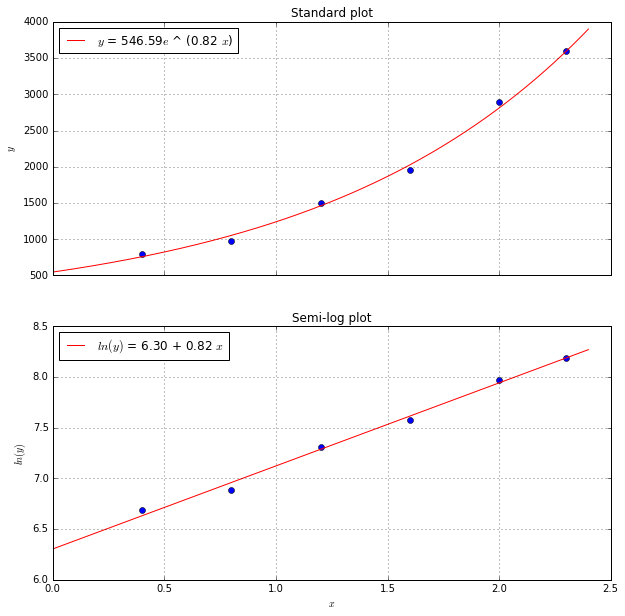

In [147]:
x = array([0.4, 0.8, 1.2, 1.6, 2.0, 2.3]) 
y = array([800, 975, 1500, 1950, 2900, 3600]) 
x1 = linspace(0, 2.4, 1000)

results = linregress(x, log(y))
a = exp(results.intercept)
b = results.slope

print("Exponential model: y = {0:.2f}e ^ ({1:.2f}x)".format(a, b))

fig, axarr = plt.subplots(2, sharex=True, figsize = (10, 10))

axarr[0].plot(x, y, 'o')
axarr[0].plot(x1, a * exp(x1 * b), 'r', label="$y$ = {0:.2f}$e$ ^ ({1:.2f} $x$)".format(a, b))
axarr[0].set_title('Standard plot')
axarr[0].set_ylabel("$y$")
axarr[0].grid()
axarr[0].legend(loc=2)

axarr[1].plot(x, log(y), 'o')
axarr[1].plot(x1, results.intercept + results.slope * x1, 'r', 
              label="$ln(y)$ = {0:.2f} + {1:.2f} $x$".format(results.intercept, results.slope))
axarr[1].set_title('Semi-log plot')
axarr[1].set_ylabel("$ln(y)$")
axarr[1].set_xlabel("$x$")
axarr[1].grid()
axarr[1].legend(loc=2);

___
## Exercise 5
Use nonlinear regression to fit a parabola to the following data  
  
\begin{array}{c|c c}
x & 0.2 & 0.5 & 0.8 & 1.2 & 1.7 & 2.0 & 2.3 \\ 
\hline
y & 500 & 700 & 1000 & 1200 & 2200 & 2650 & 3750 \\ 
\end{array} 

## Solution
To fit a parabola $y = ax^2 + bx + c$ to the data, we will use `curve_fit`.  
We just need to define function `f` that takes $x$ as the first argument and the parameters $a, b, c$ as remaining arguments.  
We get back an array of optimal values for the parameters $a, b, c$.  
Now we can plot the curve that fits the data.

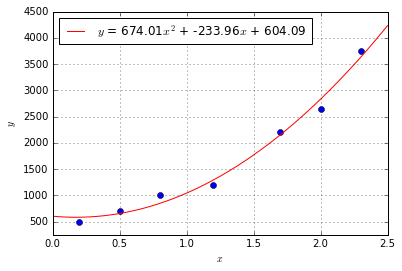

In [148]:
x = array([0.2, 0.5, 0.8, 1.2, 1.7, 2.0, 2.3])
y = array([500, 700, 1000, 1200, 2200, 2650, 3750])
x1 = linspace(0, 2.5, 1000)

f = lambda x, a, b, c : a * x**2 + b * x + c

popt, pcov = curve_fit(f, x, y)

figure()
plot(x, y, 'o')
plot(x1, f(x1, *popt), 'r', label="$y$ = {0:.2f}$x^2$ + {1:.2f}$x$ + {2:.2f}".format(popt[0], popt[1], popt[2]))
xlabel("$x$")
ylabel("$y$")
ylim(250, 4500)
grid()
legend(loc=2)
show()

___
## Exercise 6
A material is tested for cyclic fatique failure whereby a stress, in MPa, is applied to the material and the number of cycles needed to cause failure is measured. The results are in the table below. When a log-log plot of stress versus cycles is generated, the data trend shows a linear relationship. Use least-squares regression to determing a best-fit equation for this data.  
  
\begin{array}{c|c c}
N, cycles & 1 & 10 & 100 & 1000 & 10,000 & 100,000 & 1,000,000 \\ 
\hline
Stress, MPa & 1100 & 1000 & 925 & 800 & 625 & 550 & 420 \\ 
\end{array} 

## Solution
We assume that the data following the power model $y = ax^b$ because the data shows a linear relationship on the log-log plot.  
We then use `linregress` that calculates a linear least-squares regression for $log(N)$ and $log(MPa)$.   
The value of $a$ is $e^{intercept}$ and $b$ is the slope.  
Finally, we plot the data and the line on both standard and log-log graph.


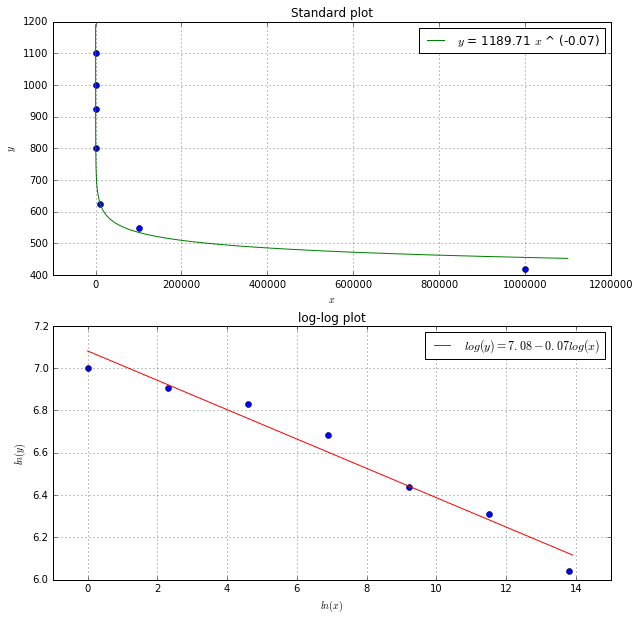

In [149]:
N = array([1, 10, 100, 1000, 10000, 100000, 1000000]) 
MPa = array([1100, 1000, 925, 800, 625, 550, 420])

results = linregress(log(N), log(MPa))

b = results.slope
a = exp(results.intercept)
x = linspace(1, 1100000, 10000)


fig, axarr = plt.subplots(2, figsize = (10, 10))

axarr[0].plot(N, MPa, 'o')
axarr[0].plot(x, a * x ** b, label='$y$ = {0:.2f} $x$ ^ ({1:.2f})'.format(a, b))
axarr[0].set_title('Standard plot')
axarr[0].set_ylabel("$y$")
axarr[0].set_xlabel("$x$")
axarr[0].set_xlim(-100000, 1200000)
axarr[0].grid()
axarr[0].legend(loc=1)

axarr[1].plot(log(N), log(MPa), 'o')
axarr[1].plot(log(x), results.intercept + results.slope * log(x), 'r', 
              label='$log(y) = {0:.2f} {1:.2f}log(x)$'.format(results.intercept, results.slope))
axarr[1].set_title('log-log plot')
axarr[1].set_ylabel("$ln(y)$")
axarr[1].set_xlabel("$ln(x)$")
axarr[1].set_xlim(-1, 15)
axarr[1].grid()
axarr[1].legend(loc=1);